# Performance v Cost analysis of sweep for an image classification task

## Install dependencies

In [1]:
!pip install fastcore >/dev/null 2>&1
!pip install wandb >/dev/null 2>&1
!pip install ghapi >/dev/null 2>&1

### Weight and Biases login

In [2]:
import wandb
wandb.login()

wandb: Currently logged in as: eolecvka. Use `wandb login --relogin` to force relogin


True

### Fetch sweep data

In [3]:
import wandb,os
from fastcore.all import *
import pandas as pd

api = wandb.Api()

sweep_ids = [
    'eolecvka/fastai-img-models/sweeps/20gckfsi'
]
sweeps = concat(api.sweep(o).runs for o in sweep_ids)
summs = [{**r.summary, 'model_name':r.config['model_name']} for r in sweeps]

df = pd.DataFrame(summs)
df['error_rate'] = 1-df.accuracy

df = df.sort_values('_timestamp').dropna()

### Add custom columns (time since start of sweep, cumulative max accuracy)

In [4]:
# Compute column: time since start of sweep
from datetime import datetime
def get_time_from_ts(ts):
    dt = datetime.fromtimestamp(ts)
    return dt.strftime("%H:%M:%S")

fit_time_first_run = df.iloc[0]['fit_time']
df['time'] = (df['_timestamp'] - df['_timestamp'].min() + fit_time_first_run) / 3600

# Compute column: cumulative max accuracy
df['best_acc'] = df['accuracy'].cummax()

### Visualize : best model found vs duration of sweep

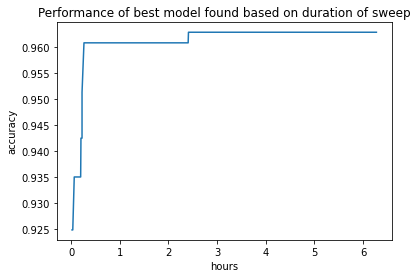

In [10]:
from matplotlib import pyplot as plt
plt.title('Performance of best model found based on duration of sweep')
plt.xlabel('hours')
plt.ylabel('accuracy')
plt.plot(df['time'], df['best_acc'])